In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras import layers
from scipy import stats

#load data
house_data = pd.read_excel('resd_data.xlsx')
house_data.head(5)

,SquareFootageStructure,LotSquareFootage,YearBuilt,Bedrooms,BathsTotal,field_StoriesTotal,field_PostalCode,ListPrice
0,1549.0,5825.0,1974.0,3.0,2.0,1.0,92624.0,3300.0
1,1196.0,7900.0,1981.0,3.0,2.0,1.0,92316.0,1600.0
2,2502.0,11326.0,1998.0,4.0,3.0,NaN,92211.0,649900.0
3,3884.0,16013.0,1978.0,3.0,3.0,1.0,90274.0,2599000.0
4,888.0,1806.0,1946.0,2.0,2.0,NaN,92651.0,3500.0


In [84]:
house_data = house_data.dropna(how='any')
house_data = house_data.iloc[:, [0, 1, 2, 3, 4, 5, 7]]
house_data = house_data[(house_data['YearBuilt'] != 0.0) &
                        (house_data['SquareFootageStructure'] != 0.0) &
                        (house_data['LotSquareFootage'] != 0.0) &
                        (house_data['Bedrooms'] != 0.0) &
                        (house_data['BathsTotal'] != 0.0) &
                        (house_data['YearBuilt'] != 0.0)]
print(house_data)
house_data = house_data[(np.abs(stats.zscore(house_data)) < 3).all(axis=1)]
print('dont')

      SquareFootageStructure  LotSquareFootage  YearBuilt  Bedrooms  \
0                     1549.0            5825.0     1974.0       3.0   
1                     1196.0            7900.0     1981.0       3.0   
3                     3884.0           16013.0     1978.0       3.0   
6                     1164.0            6611.0     1961.0       3.0   
12                    2766.0            7331.0     1986.0       4.0   
...                      ...               ...        ...       ...   
9989                  2300.0            6547.0     1924.0       4.0   
9990                  1545.0            2178.0     1967.0       2.0   
9991                  1404.0            7841.0     1964.0       2.0   
9993                   900.0            6000.0     1924.0       2.0   
9999                  2865.0            7841.0     2005.0       4.0   

      BathsTotal  field_StoriesTotal  ListPrice  
0            2.0                 1.0     3300.0  
1            2.0                 1.0     1600.0

In [85]:
house_data.shape

(5787, 7)

In [86]:
house_data.iloc[:, 6]

0          3300.0
1          1600.0
3       2599000.0
6        499999.0
12       929800.0
          ...    
9989    2445000.0
9990     320000.0
9991     228500.0
9993       2700.0
9999     399990.0
Name: ListPrice, Length: 5787, dtype: float64

(array([3272., 1587.,  420.,  200.,  120.,   88.,   39.,   28.,   13.,
          20.]),
 array([7.1500000e+02, 5.5054350e+05, 1.1003720e+06, 1.6502005e+06,
        2.2000290e+06, 2.7498575e+06, 3.2996860e+06, 3.8495145e+06,
        4.3993430e+06, 4.9491715e+06, 5.4990000e+06]),
 <a list of 10 Patch objects>)

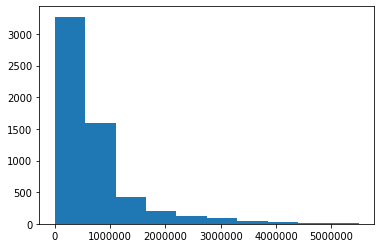

In [87]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#ax.scatter(range(1, 5788), house_data.iloc[:, 6])
ax.hist(house_data.iloc[:, 6])

In [88]:
house_data['ListPrice'].value_counts(bins=5)

(-4783.286, 1100372.0]    4859
(1100372.0, 2200029.0]     620
(2200029.0, 3299686.0]     208
(3299686.0, 4399343.0]      67
(4399343.0, 5499000.0]      33
Name: ListPrice, dtype: int64

In [89]:
house_data[house_data.iloc[:, 6] <= 30000.0].shape #drop houses below 30000

(936, 7)

In [90]:
house_data.shape

(5787, 7)

In [91]:
house_data = house_data[house_data.iloc[:, 6] > 30000.0] #drop houses below 30000

In [92]:
house_data.shape

(4851, 7)

(array([2474., 1450.,  421.,  198.,  124.,   85.,   38.,   29.,   13.,
          19.]),
 array([  30900.,  577710., 1124520., 1671330., 2218140., 2764950.,
        3311760., 3858570., 4405380., 4952190., 5499000.]),
 <a list of 10 Patch objects>)

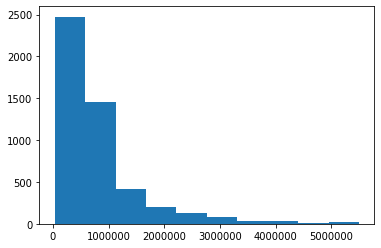

In [93]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#ax.scatter(range(1, 5788), house_data.iloc[:, 6])
ax.hist(house_data.iloc[:, 6])


In [94]:
house_data['ListPrice'].value_counts(bins=5)

(25431.899, 1124520.0]    3924
(1124520.0, 2218140.0]     619
(2218140.0, 3311760.0]     209
(3311760.0, 4405380.0]      67
(4405380.0, 5499000.0]      32
Name: ListPrice, dtype: int64

In [95]:
house_data[house_data.iloc[:, 6] <= 0.0]

,SquareFootageStructure,LotSquareFootage,YearBuilt,Bedrooms,BathsTotal,field_StoriesTotal,ListPrice


In [96]:
house_data.iloc[:,6]

3       2599000.0
6        499999.0
12       929800.0
14       689900.0
16       245000.0
          ...    
9986     220000.0
9989    2445000.0
9990     320000.0
9991     228500.0
9999     399990.0
Name: ListPrice, Length: 4851, dtype: float64

In [97]:
house_data.iloc[:,0:6].head(1)

,SquareFootageStructure,LotSquareFootage,YearBuilt,Bedrooms,BathsTotal,field_StoriesTotal
3,3884.0,16013.0,1978.0,3.0,3.0,1.0


In [98]:
house_data.describe()

,SquareFootageStructure,LotSquareFootage,YearBuilt,Bedrooms,BathsTotal,field_StoriesTotal,ListPrice
count,4851.000000,4.851000e+03,4851.000000,4851.000000,4851.000000,4851.000000,4.851000e+03
mean,2076.723974,3.311999e+04,1975.950732,3.381571,2.659246,1.439085,8.201749e+05
std,1014.242598,2.353301e+05,25.291518,0.988252,1.059832,0.664063,7.679496e+05
min,390.000000,1.000000e+00,1900.000000,1.000000,1.000000,0.000000,3.090000e+04
25%,1344.000000,5.586000e+03,1957.000000,3.000000,2.000000,1.000000,3.799000e+05
50%,1812.000000,7.405000e+03,1978.000000,3.000000,3.000000,1.000000,5.699000e+05
75%,2580.500000,1.107450e+04,1998.000000,4.000000,3.000000,2.000000,8.990000e+05
max,7640.000000,6.969600e+06,2018.000000,6.000000,6.000000,7.000000,5.499000e+06


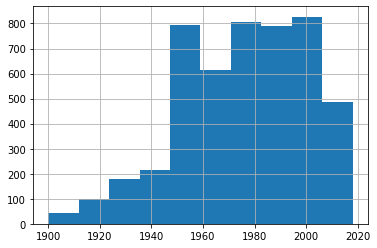

In [99]:
house_data['YearBuilt'].hist()

In [100]:
house_data['YearBuilt'].value_counts()

2005.0    131
2004.0    131
2006.0    107
2017.0    107
1989.0    106
         ... 
1900.0      1
1916.0      1
1902.0      1
1903.0      1
1933.0      1
Name: YearBuilt, Length: 118, dtype: int64

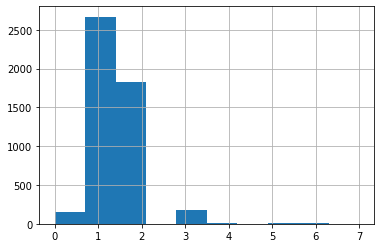

In [101]:
house_data['field_StoriesTotal'].hist()

In [102]:
house_data['field_StoriesTotal'].value_counts()

1.0    2668
2.0    1827
3.0     179
0.0     151
4.0      16
5.0       4
6.0       4
7.0       2
Name: field_StoriesTotal, dtype: int64

In [103]:
#we have 151 observations with 0 stories total

In [104]:
house_data = house_data[house_data['field_StoriesTotal'] > 0.0]

In [105]:
#divide house_data into data and labels
arr_house_data = np.array(house_data)
data = arr_house_data[..., 0:6]
labels = arr_house_data[..., 6]

#split data & labels into training and testing sets
train_ratio = 0.9
split = int(train_ratio * data.shape[0])
data_train = data[:split, :]
data_test = data[split:, :]
labels_train = labels[:split]
labels_test = labels[split:]
print('done')

done


In [106]:
mean = data_train.mean(axis = 0)
data_train = data_train - mean
std = data_train.std(axis = 0)
data_train = data_train / std
data_test -= mean
data_test /= std
print('done')

done


In [30]:
#build model
def build_model():
    model = tf.keras.models.Sequential([
        layers.Dense(8, activation='relu', input_shape=(data_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])                 
    model.compile(loss='mse', optimizer='Adam', metrics=['mse'])
    return model
model = build_model()
model.summary()
print('done')

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 8)                 56        
_________________________________________________________________
dense_31 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 65        
Total params: 697
Trainable params: 697
Non-trainable params: 0
_________________________________________________________________
done


In [31]:
#k-fold validation
k = 4
num_epochs = 100
all_scores = []
num_val_samples = len(data_train)//k
for i in range(k):
    print('processing fold #', i)
    val_data = data_train[i * num_val_samples : (i + 1) * num_val_samples]
    val_labels = labels_train[i * num_val_samples : (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([data_train[: i * num_val_samples], data_train[(i + 1) * num_val_samples :]], axis=0)
    partial_train_labels = np.concatenate([labels_train[: i * num_val_samples], labels_train[(i + 1) * num_val_samples :]], axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_labels,
              epochs=num_epochs, batch_size=100, verbose=0)
    val_mse = model.evaluate(val_data, val_labels, verbose=0)
    all_scores.append(val_mse)
    print('done')

processing fold # 0
done
processing fold # 1
done
processing fold # 2
done
processing fold # 3
done


In [32]:
print(all_scores)

[[806260166447.5114, 806260200000.0], [958358068933.6633, 958358100000.0], [677829473632.025, 677829540000.0], [752886213876.5732, 752886200000.0]]


In [33]:
num_epochs = 500
all_mse_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = data_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = labels_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [data_train[:i * num_val_samples],
         data_train[(i + 1) * num_val_samples:]],
        axis = 0)
    
    partial_train_labels = np.concatenate(
        [labels_train[:i * num_val_samples],
         labels_train[(i + 1) * num_val_samples:]],
        axis = 0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_labels,
                        validation_data = (val_data, val_targets),
                        epochs = num_epochs, batch_size = 100, verbose=0)
    mse_history = history.history['val_mean_squared_error']
    all_mse_histories.append(mse_history)
print(history.history.keys())

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


In [34]:
average_mse_history = [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]
print('done')

done


In [ ]:
house

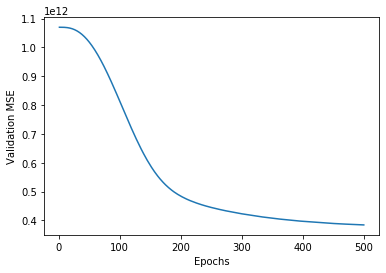

In [35]:
plt.plot(range(1, len(average_mse_history) + 1), average_mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

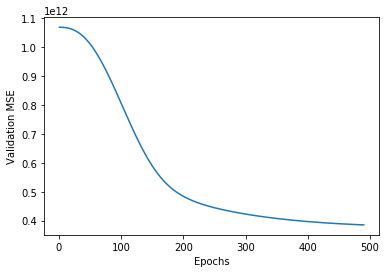

In [36]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mse_history = smooth_curve(average_mse_history[10:])

plt.plot(range(1, len(smooth_mse_history) + 1), smooth_mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [37]:
model = build_model()
model.fit(data_train, labels_train,
          epochs = 80, batch_size = 16, verbose = 0)
test_mse_score = model.evaluate(data_test, labels_test, verbose=0)
print('done')

done


In [38]:
test_mse_score

[362688123399.21124, 362688200000.0]

In [26]:
data_train

array([[-0.4744199 , -0.11645623, -0.05735734, -0.29323439, -0.59989284,
        -0.61253561],
       [-0.82869841, -0.10722342,  0.21855337, -0.29323439, -0.59989284,
        -0.61253561],
       [ 1.86903709, -0.07112422,  0.10030592, -0.29323439,  0.3529988 ,
        -0.61253561],
       ...,
       [-0.10809793, -0.10950159,  0.88862222, -1.27004518,  0.3529988 ,
         3.21238124],
       [-0.64503561, -0.11923275, -2.0675639 , -0.29323439, -0.59989284,
        -0.61253561],
       [-0.7132819 ,  0.84228384, -0.17560478, -0.29323439,  0.3529988 ,
         0.66243668]])

In [107]:
from sklearn.linear_model import LinearRegression

scikit_house = LinearRegression()
scikit_house.fit(data_train, labels_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
scikit_pred_house = scikit_house.predict(data_train)

In [109]:
def mean_squared_error(y_hat, y):
    return np.mean((y_hat-y)**2)

In [110]:
scikit_scores = mean_squared_error(scikit_pred_house, labels_train)

In [111]:
print(scikit_scores)

308034614473.35974


In [112]:
scikit_pred_test = scikit_house.predict(data_test)
scikit_test_scores = mean_squared_error(scikit_pred_test, labels_test)
print(scikit_test_scores)

289873400948.25195
